In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

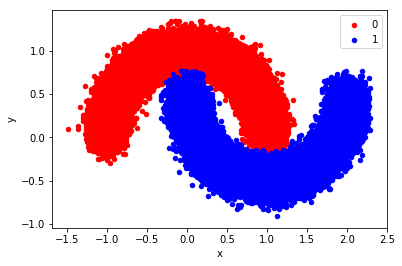

In [40]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X_train, y_train = make_moons(n_samples=100000, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

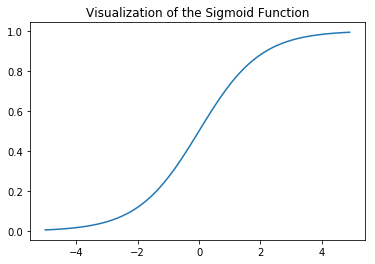

In [41]:
def sigmoid(z): 
    return 1 / (1 + np.exp( - z)) 
  
plt.plot(np.arange(-5, 5, 0.1), sigmoid(np.arange(-5, 5, 0.1))) 
plt.title('Visualization of the Sigmoid Function') 
  
plt.show() 

# Reminder of logistic regression

In [42]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder 

In [47]:
data = pd.read_csv('dataset.csv', header = None) 
print("Data Shape:", data.shape) 
  
print(data.head()) 

Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


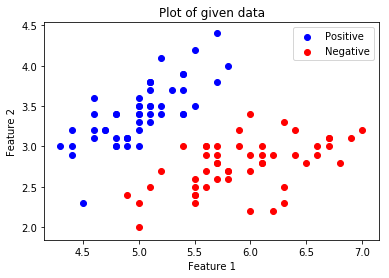

In [49]:
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show() 


In [48]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 
  
# Data labels 
y_orig = data.iloc[:, -1:].values 
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


In [50]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
  
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
alpha, epochs = 0.003, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 

m = 100
n = 7
Learning Rate = 0.003
Number of Epochs = 500


/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/davescott/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

# Start building TF model.

In [51]:
X = tf.placeholder(tf.float32, [None, n])
# y can only take two values
Y = tf.placeholder(tf.float32, [None, 2])
# trainable variable weights
W = tf.Variable(tf.zeros([n, 2]))
# trainable variable bias
b = tf.Variable(tf.zeros([2]))

In [52]:
# hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
# sigmoid cross entropy cost function
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
    logits = Y_hat, labels = Y)
# Gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(
        learning_rate = alpha).minimize(cost)
# global variables initializer
init = tf.global_variables_initializer()

### Begin training process inside a TensorFlow Session

In [53]:
# start session
with tf.Session() as sess:
    #initialize variables
    sess.run(init)
    #lists for storing and chaning Cost and Accuracy
    cost_history, accuracy_history = [], []
    # Iterating through all the epochs
    for epoch in range(epochs):
        cost_per_epoch = 0
        
        # Optimizer
        sess.run(optimizer, feed_dict = {X : x, Y : y})
        # Calculate cost on current Epoch
        c = sess.run(cost, feed_dict = {X : x, Y : y})
        
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                         tf.float32))
        # Storing Cost and Accuracy to the history
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
        
        # Displaying result on current Epoch
        if epoch % 100 == 0 and epoch !=0:
            print("Epoch " + str(epoch) + "Cost: "
                 + str(cost_history[-1]))
    
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b) # Optimized bias
    
    #Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                 tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                     tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 100Cost: 126.92844009399414
Epoch 200Cost: 121.69493103027344
Epoch 300Cost: 119.06824111938477
Epoch 400Cost: 117.39665603637695

Accuracy: 91.00000262260437 %


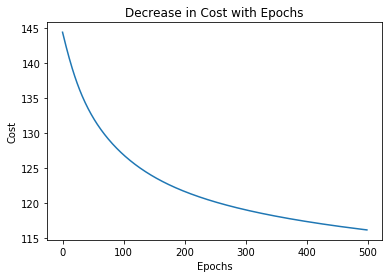

In [54]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

Text(0.5, 1.0, 'Increase in Accuracy with Epochs')

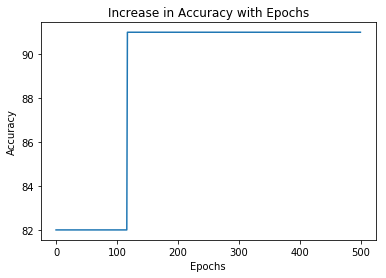

In [55]:

plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 

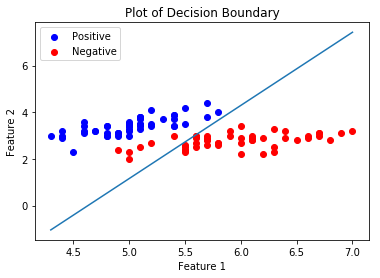

In [57]:
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) * (decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show() 